In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 문제 1

- 아래 데이터는 콘크리트 골재에 따른 콘크리트의 평균 수분 흡수율을 나타내고 있다. 콘크리트에 따른 집단은 서로 독립적이며, 모든 집단은 분산이 일정하고 정규분포를 따른다고 가정한다. 물음에 답하시오.

In [2]:
data_1 = pd.DataFrame({"gol_1":[551, 457, 450, 731, 499, 632],
                       "gol_2":[595, 580, 508, 583, 633, 517],
                       "gol_3":[639, 615, 511, 573, 648, 677],
                       "gol_4":[417, 449, 517, 438, 415, 555],
                       "gol_5":[563, 631, 522, 613, 656, 679]})
data_1

,gol_1,gol_2,gol_3,gol_4,gol_5
0,551,595,639,417,563
1,457,580,615,449,631
2,450,508,511,517,522
3,731,583,573,438,613
4,499,633,648,415,656
5,632,517,677,555,679


#### 1-1. 분산분석이 가능하도록 데이터를 가공하시오.

In [3]:
melted_data_1 = data_1.melt(var_name='variable', value_name='value')
melted_data_1.head()

,variable,value
0,gol_1,551
1,gol_1,457
2,gol_1,450
3,gol_1,731
4,gol_1,499


#### 1-2. 아래 가설에 대해 ```anova_lm``` 함수를 이용하여 분산분석을 수행하고 결과를 해석하시오.

- $H_0$ : 콘크리트 골재에 따른 평균 수분 흡수율은 차이가 없다.
- $H_1$ : 콘크리트 골재에 따른 평균 수분 흡수율은 차이가 있다.

In [4]:
melted_data_1.groupby('variable')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
variable,,,,,,,,
gol_1,6.0,553.333333,110.153832,450.0,467.50,525.0,611.75,731.0
gol_2,6.0,569.333333,47.986109,508.0,532.75,581.5,592.00,633.0
gol_3,6.0,610.500000,59.945809,511.0,583.50,627.0,645.75,677.0
gol_4,6.0,465.166667,57.607002,415.0,422.25,443.5,500.00,555.0
gol_5,6.0,610.666667,58.783218,522.0,575.50,622.0,649.75,679.0


In [5]:
fit = smf.ols('value~variable', melted_data_1).fit()
sm.stats.anova_lm(fit, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
variable,4.0,85356.466667,21339.116667,4.301536,0.008752
Residual,25.0,124020.333333,4960.813333,NaN,NaN


- 분산분석 결과 $F$값은 4.3015이며 $p$값은 0.0088로 귀무가설 $H_0$를 기각한다. 따라서 다섯 가지 골재 종류에 따른 콘크리트의 평균 수분 흡수율은 차이가 있다고 판단한다.

### 1-3. 위 결과에 대해 사후검증을 수행하고 결과를 해석하시오.

In [ ]:
pip install statsmodels

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_hsd = pairwise_tukeyhsd(melted_data_1['value'], melted_data_1['variable'])
summary_hsd = tukey_hsd.summary()
summary_hsd

group1,group2,meandiff,p-adj,lower,upper,reject
gol_1,gol_2,16.0,0.9946,-103.4265,135.4265,False
gol_1,gol_3,57.1667,0.6297,-62.2598,176.5932,False
gol_1,gol_4,-88.1667,0.2243,-207.5932,31.2598,False
gol_1,gol_5,57.3333,0.6272,-62.0932,176.7598,False
gol_2,gol_3,41.1667,0.8473,-78.2598,160.5932,False
gol_2,gol_4,-104.1667,0.1088,-223.5932,15.2598,False
gol_2,gol_5,41.3333,0.8454,-78.0932,160.7598,False
gol_3,gol_4,-145.3333,0.0116,-264.7598,-25.9068,True
gol_3,gol_5,0.1667,1.0,-119.2598,119.5932,False
gol_4,gol_5,145.5,0.0115,26.0735,264.9265,True


- False의 경우 귀무가설 채택하므로 이는 해당 집단끼리는 수분흡수율에 차이가 없다고 판단한다.
- 반면 True의 경우 귀무가설을 기각하므로 해당 집단끼리는 수분흡수율에 차이가 있다고 판단할 수 있다.

### 문제 2
- 아래 데이터는 곤충의 유전자 유형과 성장시기에 따른 크기 차이를 나타낸다.

    - 독립변수 A : 곤충의 유전자 유형
    - 독립변수 B : 곤충의 성장시기
    - 반응변수($y$) : 곤충의 크기

- 아래 데이터는 분산분석을 위한 모든 가정을 만족한다. 물음에 답하시오.

In [8]:
data_2 = pd.read_csv("https://reneshbedre.github.io/assets/posts/anova/twowayanova.txt", sep = "\t")
data_2.head()

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95


#### 문제 2-1

반복이 있는 이원배치분산분석을 위해 곤충의 크기를 반응변수로 할 때의 가설을 설정하시오.

- 답안1

    - $H_0$: 모든 집단 간 곤충 크기에는 유의미한 차이가 없을 것이다. 
    - $H_1$: 적어도 한 개의 집단에서는 유의미한 차이가 발생할 것이다. 

- 답안2

    - $H_0^A$: 곤충의 유전자 유형과 곤충의 크기는 차이가 없다.
    - $H_1^A$: 곤충의 유전자 유형과 곤충의 크기는 차이가 있다. 

    - $H_0^B$: 곤충의 성장시기와 곤충의 크기는 차이가 없다.
    - $H_1^B$: 곤충의 성장시기와 곤충의 크기는 차이가 있다.

    - $H_0^{AB}$: 곤충의 유전자 유형과 곤충의 성장시기는 교호효과는 없다.
    - $H_1^{AB}$: 곤충의 유전자 유형과 곤충의 성장시기는 교호효과는 있다.

#### 문제 2-2

반복이 있는 이원배치분산분석을 수행하고 그 결과를 해석하시오.

In [9]:
melted_data_2 = data_2.melt(id_vars = 'Genotype', value_name='value')
melted_data_2.columns = ['A_fac', 'B_fac', 'y']
melted_data_2.head()

,A_fac,B_fac,y
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


In [10]:
fit = smf.ols('y ~ C(A_fac) + C(B_fac) + C(A_fac):C(B_fac)', 
          data = melted_data_2).fit()
 
sm.stats.anova_lm(fit, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(A_fac),5.0,58.551733,11.710347,32.748581,1.931655e-12
C(B_fac),2.0,278.925633,139.462817,390.014868,4.006243e-25
C(A_fac):C(B_fac),10.0,17.122967,1.712297,4.788525,2.230094e-04
Residual,36.0,12.873000,0.357583,NaN,NaN


- $H_0^{AB}$의 교호효과에 대하여 $p$값이 매우 작으므로 교호효과는 존재한다.
- $H_0^A$에 대한 $p$값이 매우 작으므로 곤충의 유전자 유형은 곤충의 크기와 차이가 없다.
- $H_0^B$에 대한 $p$값이 매우 작으므로 곤충의 성장시기는 곤충의 크기와 차이가 없다.

#### 문제 2-3

위에서 얻은 결과와 관련하여 교호효과 여부를 볼 수 있도록 그래프로 나타내고 그 결과를 해석하시오.

- 교호효과를 시각화하기 위해 ```interaction_plot()``` 함수를 활용하고 아래 인수를 참고하시오.
    - x: 범주형 변수의 이름을 나타내는 배열 또는 시리즈. 이 변수는 x축에 표시한다.
    - trace: 또 다른 범주형 변수의 이름을 나타내는 배열 또는 시리즈. 이 변수는 각 그룹의 라인을 구분하는 데 사용된다.
    - response: 종속 변수의 이름을 나타내는 배열 또는 시리즈. 이 변수는 y축에 표시된다.

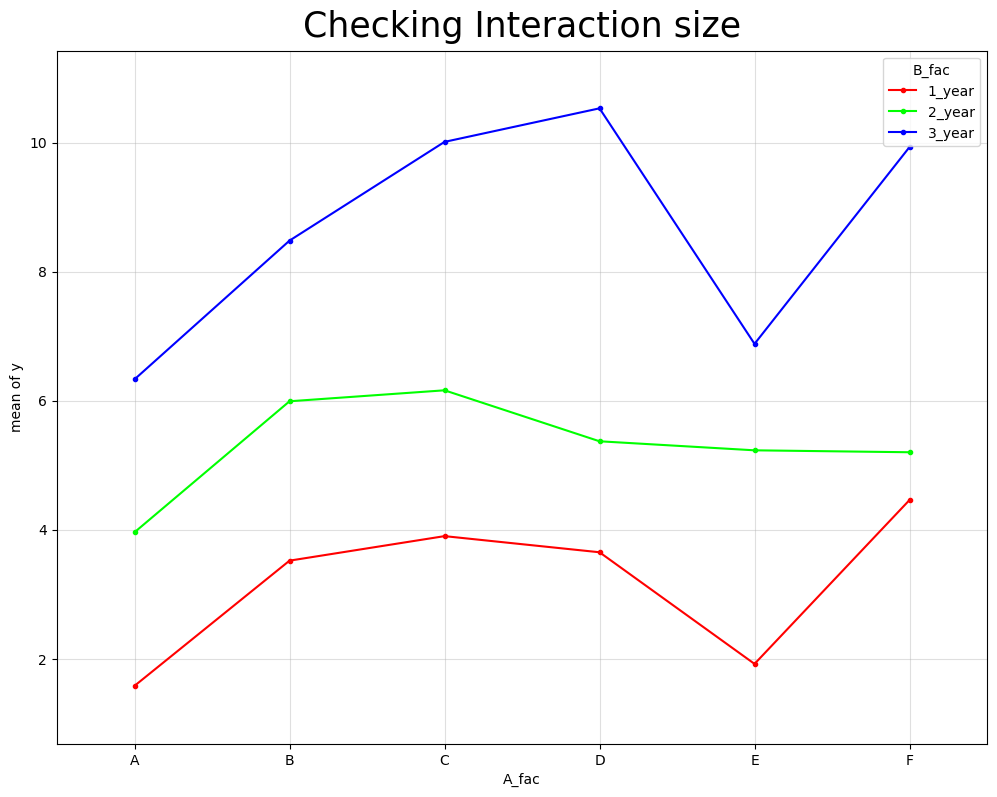

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)

fig = interaction_plot(x=melted_data_2['A_fac'], 
                       trace = melted_data_2['B_fac'], 
                       response=melted_data_2['y']
                       )
plt.title("Checking Interaction size", fontsize = 25, pad = 10)
plt.grid(alpha = 0.4);

- 유전자 유형 A, B에서는 특별한 교호효과를 확인하기 어려운 반면, D, E의 경우 성장시기에 따른 뚜렷한 교호효과를 확인할 수 있다.

### 문제 2-4

튜키 방법을 이용하여 사후분석을 수행하고 결과를 해석하시오.

In [27]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [32]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
melted_data_2['group_combination'] = melted_data_2.A_fac + "-" + melted_data_2.B_fac
tukey_hsd = pairwise_tukeyhsd(melted_data_2.query('A_fac == ["D", "E"]')['y'], melted_data_2.query('A_fac == ["D", "E"]')['group_combination'])
summary_hsd = tukey_hsd.summary()
summary_hsd

group1,group2,meandiff,p-adj,lower,upper,reject
D-1_year,D-2_year,1.72,0.1518,-0.4391,3.8791,False
D-1_year,D-3_year,6.88,0.0,4.7209,9.0391,True
D-1_year,E-1_year,-1.73,0.1482,-3.8891,0.4291,False
D-1_year,E-2_year,1.58,0.2113,-0.5791,3.7391,False
D-1_year,E-3_year,3.23,0.0031,1.0709,5.3891,True
D-2_year,D-3_year,5.16,0.0,3.0009,7.3191,True
D-2_year,E-1_year,-3.45,0.0018,-5.6091,-1.2909,True
D-2_year,E-2_year,-0.14,0.9999,-2.2991,2.0191,False
D-2_year,E-3_year,1.51,0.2475,-0.6491,3.6691,False
D-3_year,E-1_year,-8.61,0.0,-10.7691,-6.4509,True


- 확인 결과 D & E 사이에서 교호효과가 있는것으로 판단된다. 

- 참고 사이트 : https://data-marketing-bk.tistory.com/m/entry/Python%EC%9D%B4%EC%9B%90%EB%B6%84%EC%82%B0%EB%B6%84%EC%84%9DTwo-way-ANOVA-%EC%BD%94%EB%93%9C%EB%B6%80%ED%84%B0-%EA%B2%B0%EA%B3%BC-%ED%95%B4%EC%84%9D-%EA%B0%80%EC%9D%B4%EB%93%9C